# Получение данных

In [206]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

# import opendatasets as od

In [207]:
# ! pip install kaggle

In [208]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [209]:
! kaggle datasets download unsdsn/world-happiness

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
world-happiness.zip: Skipping, found more recently modified local copy (use --force to force download)


In [210]:
# ! unzip world-happiness.zip

In [211]:
df = pd.read_csv('2019.csv')
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [212]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [213]:
df.drop(columns = ['Overall rank', 'Generosity', 'Perceptions of corruption', 'GDP per capita'], inplace=True)

In [214]:
df.describe()

,Score,Social support,Healthy life expectancy,Freedom to make life choices
count,156.000000,156.000000,156.000000,156.000000
mean,5.407096,1.208814,0.725244,0.392571
std,1.113120,0.299191,0.242124,0.143289
min,2.853000,0.000000,0.000000,0.000000
25%,4.544500,1.055750,0.547750,0.308000
50%,5.379500,1.271500,0.789000,0.417000
75%,6.184500,1.452500,0.881750,0.507250
max,7.769000,1.624000,1.141000,0.631000


In [215]:
df.info()
# Country or region              //
# Score                          Счет
# GDP per capita                 //ВВП на душу населения
# Social support                 Социальная поддержка
# Healthy life expectancy        Ожидаемая продолжительность здоровой жизни
# Freedom to make life choices   Свобода делать жизненный выбор

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.2+ KB


<Axes: ylabel='Score'>

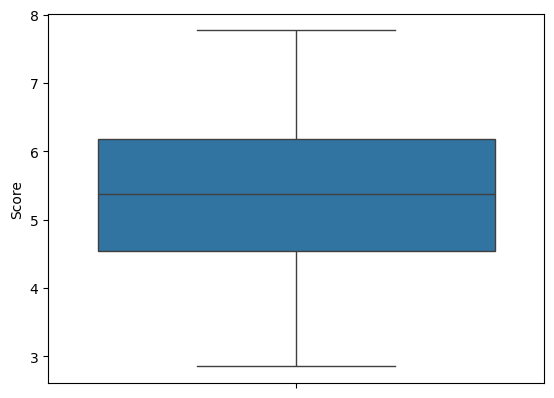

In [216]:
sns.boxplot(df['Score'])

In [217]:
df['Score'].value_counts()

,count
Score,
5.208,2
7.769,1
4.883,1
4.812,1
4.799,1
...,...
5.940,1
5.895,1
5.893,1


In [218]:
df['Healthy life expectancy'].value_counts()

,count
Healthy life expectancy,
0.999,5
0.815,5
0.828,4
0.871,3
0.874,3
...,...
1.088,1
0.798,1
0.812,1


# Визуальный анализ (гистограммы)

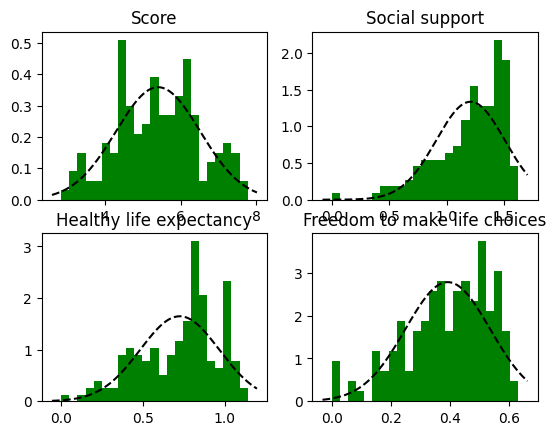

In [219]:
keys = ["Score", "Social support", "Healthy life expectancy", "Freedom to make life choices"]

fig, axes = plt.subplots(2,2)
fig.set_size_inches = (15, 50)
axes = axes.flatten()

for key, ax in zip(keys, axes):
  ax.hist(df[key], density=True, bins=23, color='green')

  loc = df[key].mean()
  scale = df[key].std()

  x_left, x_right = ax.get_xlim()
  x = np.linspace(x_left, x_right, 10000)
  y = stats.norm.pdf(x, loc=loc, scale=scale)

  ax.plot(x, y, linestyle = 'dashed', color='black')
  ax.set_title(key)


Линии поверх - как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

# Визуальный анализ (квантили)

Q-Q кривая - график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.


---


F S



S F

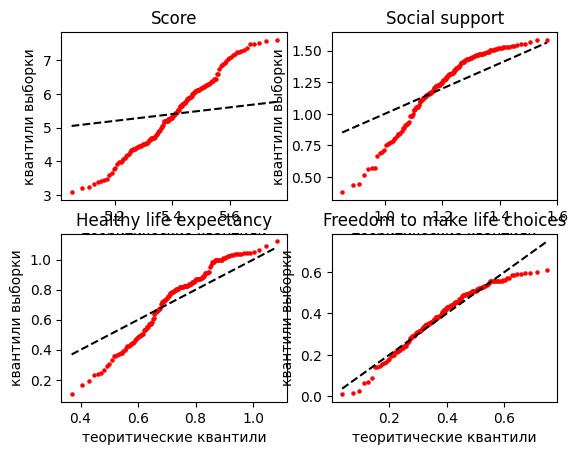

In [220]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches = (20, 15)
axes = axes.flatten()


for key, ax in zip(keys, axes):
  samples = df[key]

  loc = samples.mean()
  scales = samples.std()

  interval = np.linspace(0, 1, samples.shape[0])[1:-1]
  x = stats.norm.ppf(interval, loc=loc, scale=scale)
  y = np.quantile(samples, interval)

  ax.scatter(x, y, s=5, color='red')
  ax.plot(x, x, color='black', linestyle = 'dashed')

  ax.set_title(key)
  ax.set_xlabel('теоритические квантили')
  ax.set_ylabel('квантили выборки')

  # f s
  # s f

# Стастические показатели для выборок

Оценим нормальность выборок также на основании известных характеристик нормального распределения.
-В частности:
* Вероятность попасть в интервал от  𝜇−𝜎  до  𝜇 +𝜎  равна  0.68 ,
* В интервал от  𝜇−2𝜎  до  𝜇+2𝜎  —  0.95 ,
* В интервал от  𝜇−3𝜎  до  𝜇+3𝜎  —  0.997

In [221]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Score
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6987179487179487
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9807692307692307
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Social support
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.717948717948718
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9487179487179487
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9935897435897436

Healthy life expectancy
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6217948717948718
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.967948717948718
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Freedom to make life choices
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6602564102564102
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9551282051282052
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



# Корелляционная сетка - тепловая карта

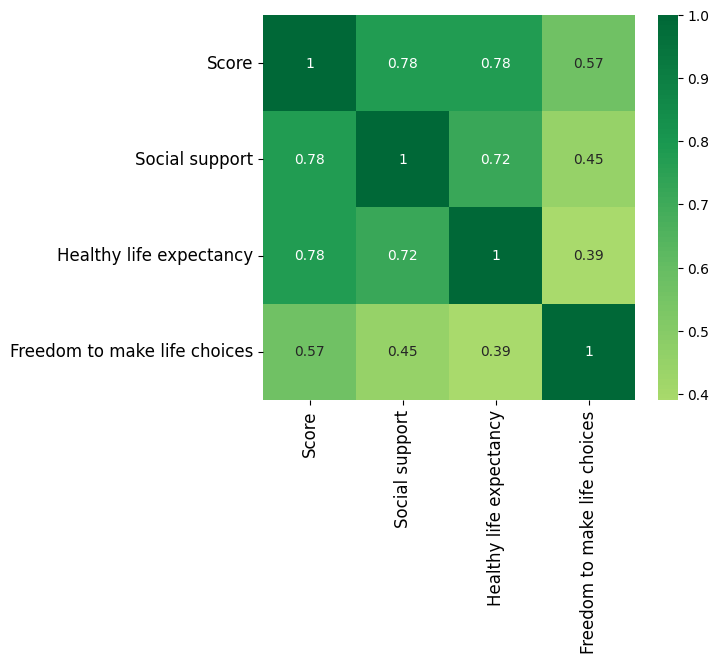

In [222]:
#heatmap для матрицы корреляции числовых переменных в датасете.
df_corr = df[keys].corr()

plt.figure(figsize=(6,5))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='RdYlGn',
            center=0,
            annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Score                          Счет
# Social support                 Социальная поддержка
# Healthy life expectancy        Ожидаемая продолжительность здоровой жизни
# Freedom to make life choices   Свобода делать жизненный выбор

In [223]:
columns_drop_02 = []
target_col = 'Score'
keys = ['Social support',
        'Healthy life expectancy',
        'Freedom to make life choices']
data = df[keys]

for i in data.columns:
  if df_corr.loc[target_col, i] < 0.7:
    columns_drop_02.append(i)

columns_drop_02

['Freedom to make life choices']

In [224]:
data.drop(columns=columns_drop_02, inplace = True)

<ipython-input-224-0a093e4005f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_drop_02, inplace = True)


In [225]:
data.columns

Index(['Social support', 'Healthy life expectancy'], dtype='object')

In [226]:
# коллинераны (корр >= 0.7):

Частный коэффициент корреляции между $(z)$ и $(x)$ при фиксировании переменной (y) определяется следующим образом: \

$[ r_{zy \cdot x} = \frac{r_{zy} - r_{xy} \cdot r_{zx}}{\sqrt{(1 - r_{xy}^2)(1 - r_{zx}^2)}} ]$

Для каждого фактора “фиксируем” его в модели и перебираем оставшиеся факторы, считая частные коэффициенты.
Рассчитываем матрицу корреляций для r


In [227]:
def r_zxi_xj(r_zxi, r_xixj, r_zxj):
  return (r_zxi - r_xixj*r_zxj) / ((1-r_zxj**2) * (1-r_xixj**2))**0.5

In [228]:
# r_z_xi_xj
# xi - фикс
# xj - меняем

delta_matrix = pd.DataFrame(index=data.columns, columns=data.columns)

for i in data.columns:
  # print(f"Фиксируем  {i}:")
  delta_count = 0
  delta_sum = 0
  r_z_xi = df_corr.loc[target_col, i]
  for j in data.columns:
    if i != j:
      r_z_xj = df_corr.loc[target_col, j]
      r_z_xi = df_corr.loc[target_col, i]
      r_xi_xj = df_corr.loc[i, j]

      # корреляция price и j при фиксированном i
      New_Corr = r_zxi_xj(r_z_xi, r_xi_xj, r_z_xj)

      delta = abs(r_z_xi - New_Corr)
      delta_sum += delta

      delta_matrix.loc[i, j] = delta
    delta_matrix.loc[i, i] = 0

delta_matrix = delta_matrix.apply(pd.to_numeric, errors='coerce')

# delta_matrix
# слева -  то что фикс
# названия столбцов = изменяемые переменные

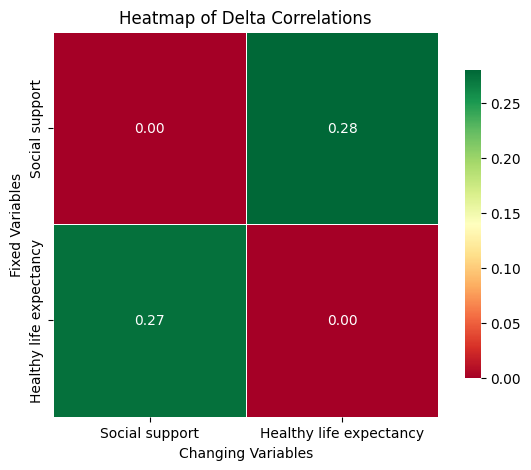

In [229]:
plt.figure(figsize=(7, 5))

sns.heatmap(delta_matrix, annot=True, fmt=".2f", cmap='RdYlGn', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)

plt.title('Heatmap of Delta Correlations')
plt.xlabel('Changing Variables')
plt.ylabel('Fixed Variables')
plt.show()